In [1]:
import pandasql as qry
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse
import matplotlib.pyplot as plt

In [3]:
# cargo data
raw_data = pd.read_csv('notebook/data/raw_data.csv')
catalog = pd.read_json('model/catalog.json', encoding ='utf-8')
catalog['code'] = catalog['code'].astype(str)
catalog['codes'] = 't_' + catalog['code']

print(catalog.head())
raw_data.head()

code                    continent                             country iata  \
0    0  {'name': 'America del Sur'}                  {'name': 'Brasil'}  ZMA   
1    1             {'name': 'Asia'}  {'name': 'Emiratos Árabes Unidos'}  AUH   
2    2             {'name': 'Asia'}                 {'name': 'Malasia'}  KUL   
3    3             {'name': 'Asia'}           {'name': 'Corea del Sur'}  SEL   
4    4             {'name': 'Asia'}                   {'name': 'Rusia'}  GOJ   

               name codes  
0          Maragogi   t_0  
1          Abu Dabi   t_1  
2      Kuala Lumpur   t_2  
3              Seúl   t_3  
4  Nizhniy Novgorod   t_4  


,birthday,codes,country,gender,id
0,NaN,", 23, 23, 23, 23, 239, 239, 330,",MEX,NaN,453790
1,NaN,", 371, 371, 371, 357, 357, 357, 357, 357, 357,",ARG,NaN,417015
2,NaN,", 335, 24, 285, 327,",BRA,NaN,550144
3,NaN,", 197, 318, 197, 15, 318, 197, 15, 318, 197, 1...",MEX,NaN,505279
4,NaN,", 285, 222, 249, 249, 312, 312, 268, 268,",BRA,NaN,178328


In [4]:
# Armo el dataset como lo necesito: las columnas son todos los destinos posibles y las filas son todos los usuarios que buscaron en el sitio
sparse_matrix = qry.sqldf('''
select id
,case when codes like '%, 0,%' then 1 else 0 end as t_0
,case when codes like '%, 1,%' then 1 else 0 end as t_1
,case when codes like '%, 2,%' then 1 else 0 end as t_2
,case when codes like '%, 3,%' then 1 else 0 end as t_3
,case when codes like '%, 4,%' then 1 else 0 end as t_4
,case when codes like '%, 5,%' then 1 else 0 end as t_5
,case when codes like '%, 6,%' then 1 else 0 end as t_6
,case when codes like '%, 7,%' then 1 else 0 end as t_7
,case when codes like '%, 8,%' then 1 else 0 end as t_8
,case when codes like '%, 9,%' then 1 else 0 end as t_9
,case when codes like '%, 10,%' then 1 else 0 end as t_10
,case when codes like '%, 11,%' then 1 else 0 end as t_11
,case when codes like '%, 12,%' then 1 else 0 end as t_12
,case when codes like '%, 13,%' then 1 else 0 end as t_13
,case when codes like '%, 14,%' then 1 else 0 end as t_14
,case when codes like '%, 15,%' then 1 else 0 end as t_15
,case when codes like '%, 16,%' then 1 else 0 end as t_16
,case when codes like '%, 17,%' then 1 else 0 end as t_17
,case when codes like '%, 18,%' then 1 else 0 end as t_18
,case when codes like '%, 19,%' then 1 else 0 end as t_19
,case when codes like '%, 20,%' then 1 else 0 end as t_20
,case when codes like '%, 21,%' then 1 else 0 end as t_21
,case when codes like '%, 22,%' then 1 else 0 end as t_22
,case when codes like '%, 23,%' then 1 else 0 end as t_23
,case when codes like '%, 24,%' then 1 else 0 end as t_24
,case when codes like '%, 25,%' then 1 else 0 end as t_25
,case when codes like '%, 26,%' then 1 else 0 end as t_26
,case when codes like '%, 27,%' then 1 else 0 end as t_27
,case when codes like '%, 28,%' then 1 else 0 end as t_28
,case when codes like '%, 29,%' then 1 else 0 end as t_29
,case when codes like '%, 30,%' then 1 else 0 end as t_30
,case when codes like '%, 31,%' then 1 else 0 end as t_31
,case when codes like '%, 32,%' then 1 else 0 end as t_32
,case when codes like '%, 33,%' then 1 else 0 end as t_33
,case when codes like '%, 34,%' then 1 else 0 end as t_34
,case when codes like '%, 35,%' then 1 else 0 end as t_35
,case when codes like '%, 36,%' then 1 else 0 end as t_36
,case when codes like '%, 37,%' then 1 else 0 end as t_37
,case when codes like '%, 38,%' then 1 else 0 end as t_38
,case when codes like '%, 39,%' then 1 else 0 end as t_39
,case when codes like '%, 40,%' then 1 else 0 end as t_40
,case when codes like '%, 41,%' then 1 else 0 end as t_41
,case when codes like '%, 42,%' then 1 else 0 end as t_42
,case when codes like '%, 43,%' then 1 else 0 end as t_43
,case when codes like '%, 44,%' then 1 else 0 end as t_44
,case when codes like '%, 45,%' then 1 else 0 end as t_45
,case when codes like '%, 46,%' then 1 else 0 end as t_46
,case when codes like '%, 47,%' then 1 else 0 end as t_47
,case when codes like '%, 48,%' then 1 else 0 end as t_48
,case when codes like '%, 49,%' then 1 else 0 end as t_49
,case when codes like '%, 50,%' then 1 else 0 end as t_50
,case when codes like '%, 51,%' then 1 else 0 end as t_51
,case when codes like '%, 52,%' then 1 else 0 end as t_52
,case when codes like '%, 53,%' then 1 else 0 end as t_53
,case when codes like '%, 54,%' then 1 else 0 end as t_54
,case when codes like '%, 55,%' then 1 else 0 end as t_55
,case when codes like '%, 56,%' then 1 else 0 end as t_56
,case when codes like '%, 57,%' then 1 else 0 end as t_57
,case when codes like '%, 58,%' then 1 else 0 end as t_58
,case when codes like '%, 59,%' then 1 else 0 end as t_59
,case when codes like '%, 60,%' then 1 else 0 end as t_60
,case when codes like '%, 61,%' then 1 else 0 end as t_61
,case when codes like '%, 62,%' then 1 else 0 end as t_62
,case when codes like '%, 63,%' then 1 else 0 end as t_63
,case when codes like '%, 64,%' then 1 else 0 end as t_64
,case when codes like '%, 65,%' then 1 else 0 end as t_65
,case when codes like '%, 66,%' then 1 else 0 end as t_66
,case when codes like '%, 67,%' then 1 else 0 end as t_67
,case when codes like '%, 68,%' then 1 else 0 end as t_68
,case when codes like '%, 69,%' then 1 else 0 end as t_69
,case when codes like '%, 70,%' then 1 else 0 end as t_70
,case when codes like '%, 71,%' then 1 else 0 end as t_71
,case when codes like '%, 72,%' then 1 else 0 end as t_72
,case when codes like '%, 73,%' then 1 else 0 end as t_73
,case when codes like '%, 74,%' then 1 else 0 end as t_74
,case when codes like '%, 75,%' then 1 else 0 end as t_75
,case when codes like '%, 76,%' then 1 else 0 end as t_76
,case when codes like '%, 77,%' then 1 else 0 end as t_77
,case when codes like '%, 78,%' then 1 else 0 end as t_78
,case when codes like '%, 79,%' then 1 else 0 end as t_79
,case when codes like '%, 80,%' then 1 else 0 end as t_80
,case when codes like '%, 81,%' then 1 else 0 end as t_81
,case when codes like '%, 82,%' then 1 else 0 end as t_82
,case when codes like '%, 83,%' then 1 else 0 end as t_83
,case when codes like '%, 84,%' then 1 else 0 end as t_84
,case when codes like '%, 85,%' then 1 else 0 end as t_85
,case when codes like '%, 86,%' then 1 else 0 end as t_86
,case when codes like '%, 87,%' then 1 else 0 end as t_87
,case when codes like '%, 88,%' then 1 else 0 end as t_88
,case when codes like '%, 89,%' then 1 else 0 end as t_89
,case when codes like '%, 90,%' then 1 else 0 end as t_90
,case when codes like '%, 91,%' then 1 else 0 end as t_91
,case when codes like '%, 92,%' then 1 else 0 end as t_92
,case when codes like '%, 93,%' then 1 else 0 end as t_93
,case when codes like '%, 94,%' then 1 else 0 end as t_94
,case when codes like '%, 95,%' then 1 else 0 end as t_95
,case when codes like '%, 96,%' then 1 else 0 end as t_96
,case when codes like '%, 97,%' then 1 else 0 end as t_97
,case when codes like '%, 98,%' then 1 else 0 end as t_98
,case when codes like '%, 99,%' then 1 else 0 end as t_99
,case when codes like '%, 100,%' then 1 else 0 end as t_100
,case when codes like '%, 101,%' then 1 else 0 end as t_101
,case when codes like '%, 102,%' then 1 else 0 end as t_102
,case when codes like '%, 103,%' then 1 else 0 end as t_103
,case when codes like '%, 104,%' then 1 else 0 end as t_104
,case when codes like '%, 105,%' then 1 else 0 end as t_105
,case when codes like '%, 106,%' then 1 else 0 end as t_106
,case when codes like '%, 107,%' then 1 else 0 end as t_107
,case when codes like '%, 108,%' then 1 else 0 end as t_108
,case when codes like '%, 109,%' then 1 else 0 end as t_109
,case when codes like '%, 110,%' then 1 else 0 end as t_110
,case when codes like '%, 111,%' then 1 else 0 end as t_111
,case when codes like '%, 112,%' then 1 else 0 end as t_112
,case when codes like '%, 113,%' then 1 else 0 end as t_113
,case when codes like '%, 114,%' then 1 else 0 end as t_114
,case when codes like '%, 115,%' then 1 else 0 end as t_115
,case when codes like '%, 116,%' then 1 else 0 end as t_116
,case when codes like '%, 117,%' then 1 else 0 end as t_117
,case when codes like '%, 118,%' then 1 else 0 end as t_118
,case when codes like '%, 119,%' then 1 else 0 end as t_119
,case when codes like '%, 120,%' then 1 else 0 end as t_120
,case when codes like '%, 121,%' then 1 else 0 end as t_121
,case when codes like '%, 122,%' then 1 else 0 end as t_122
,case when codes like '%, 123,%' then 1 else 0 end as t_123
,case when codes like '%, 124,%' then 1 else 0 end as t_124
,case when codes like '%, 125,%' then 1 else 0 end as t_125
,case when codes like '%, 126,%' then 1 else 0 end as t_126
,case when codes like '%, 127,%' then 1 else 0 end as t_127
,case when codes like '%, 128,%' then 1 else 0 end as t_128
,case when codes like '%, 129,%' then 1 else 0 end as t_129
,case when codes like '%, 130,%' then 1 else 0 end as t_130
,case when codes like '%, 131,%' then 1 else 0 end as t_131
,case when codes like '%, 132,%' then 1 else 0 end as t_132
,case when codes like '%, 133,%' then 1 else 0 end as t_133
,case when codes like '%, 134,%' then 1 else 0 end as t_134
,case when codes like '%, 135,%' then 1 else 0 end as t_135
,case when codes like '%, 136,%' then 1 else 0 end as t_136
,case when codes like '%, 137,%' then 1 else 0 end as t_137
,case when codes like '%, 138,%' then 1 else 0 end as t_138
,case when codes like '%, 139,%' then 1 else 0 end as t_139
,case when codes like '%, 140,%' then 1 else 0 end as t_140
,case when codes like '%, 141,%' then 1 else 0 end as t_141
,case when codes like '%, 142,%' then 1 else 0 end as t_142
,case when codes like '%, 143,%' then 1 else 0 end as t_143
,case when codes like '%, 144,%' then 1 else 0 end as t_144
,case when codes like '%, 145,%' then 1 else 0 end as t_145
,case when codes like '%, 146,%' then 1 else 0 end as t_146
,case when codes like '%, 147,%' then 1 else 0 end as t_147
,case when codes like '%, 148,%' then 1 else 0 end as t_148
,case when codes like '%, 149,%' then 1 else 0 end as t_149
,case when codes like '%, 150,%' then 1 else 0 end as t_150
,case when codes like '%, 151,%' then 1 else 0 end as t_151
,case when codes like '%, 152,%' then 1 else 0 end as t_152
,case when codes like '%, 153,%' then 1 else 0 end as t_153
,case when codes like '%, 154,%' then 1 else 0 end as t_154
,case when codes like '%, 155,%' then 1 else 0 end as t_155
,case when codes like '%, 156,%' then 1 else 0 end as t_156
,case when codes like '%, 157,%' then 1 else 0 end as t_157
,case when codes like '%, 158,%' then 1 else 0 end as t_158
,case when codes like '%, 159,%' then 1 else 0 end as t_159
,case when codes like '%, 160,%' then 1 else 0 end as t_160
,case when codes like '%, 161,%' then 1 else 0 end as t_161
,case when codes like '%, 162,%' then 1 else 0 end as t_162
,case when codes like '%, 163,%' then 1 else 0 end as t_163
,case when codes like '%, 164,%' then 1 else 0 end as t_164
,case when codes like '%, 165,%' then 1 else 0 end as t_165
,case when codes like '%, 166,%' then 1 else 0 end as t_166
,case when codes like '%, 167,%' then 1 else 0 end as t_167
,case when codes like '%, 168,%' then 1 else 0 end as t_168
,case when codes like '%, 169,%' then 1 else 0 end as t_169
,case when codes like '%, 170,%' then 1 else 0 end as t_170
,case when codes like '%, 171,%' then 1 else 0 end as t_171
,case when codes like '%, 172,%' then 1 else 0 end as t_172
,case when codes like '%, 173,%' then 1 else 0 end as t_173
,case when codes like '%, 174,%' then 1 else 0 end as t_174
,case when codes like '%, 175,%' then 1 else 0 end as t_175
,case when codes like '%, 176,%' then 1 else 0 end as t_176
,case when codes like '%, 177,%' then 1 else 0 end as t_177
,case when codes like '%, 178,%' then 1 else 0 end as t_178
,case when codes like '%, 179,%' then 1 else 0 end as t_179
,case when codes like '%, 180,%' then 1 else 0 end as t_180
,case when codes like '%, 181,%' then 1 else 0 end as t_181
,case when codes like '%, 182,%' then 1 else 0 end as t_182
,case when codes like '%, 183,%' then 1 else 0 end as t_183
,case when codes like '%, 184,%' then 1 else 0 end as t_184
,case when codes like '%, 185,%' then 1 else 0 end as t_185
,case when codes like '%, 186,%' then 1 else 0 end as t_186
,case when codes like '%, 187,%' then 1 else 0 end as t_187
,case when codes like '%, 188,%' then 1 else 0 end as t_188
,case when codes like '%, 189,%' then 1 else 0 end as t_189
,case when codes like '%, 190,%' then 1 else 0 end as t_190
,case when codes like '%, 191,%' then 1 else 0 end as t_191
,case when codes like '%, 192,%' then 1 else 0 end as t_192
,case when codes like '%, 193,%' then 1 else 0 end as t_193
,case when codes like '%, 194,%' then 1 else 0 end as t_194
,case when codes like '%, 195,%' then 1 else 0 end as t_195
,case when codes like '%, 196,%' then 1 else 0 end as t_196
,case when codes like '%, 197,%' then 1 else 0 end as t_197
,case when codes like '%, 198,%' then 1 else 0 end as t_198
,case when codes like '%, 199,%' then 1 else 0 end as t_199
,case when codes like '%, 200,%' then 1 else 0 end as t_200
,case when codes like '%, 201,%' then 1 else 0 end as t_201
,case when codes like '%, 202,%' then 1 else 0 end as t_202
,case when codes like '%, 203,%' then 1 else 0 end as t_203
,case when codes like '%, 204,%' then 1 else 0 end as t_204
,case when codes like '%, 205,%' then 1 else 0 end as t_205
,case when codes like '%, 206,%' then 1 else 0 end as t_206
,case when codes like '%, 207,%' then 1 else 0 end as t_207
,case when codes like '%, 208,%' then 1 else 0 end as t_208
,case when codes like '%, 209,%' then 1 else 0 end as t_209
,case when codes like '%, 210,%' then 1 else 0 end as t_210
,case when codes like '%, 211,%' then 1 else 0 end as t_211
,case when codes like '%, 212,%' then 1 else 0 end as t_212
,case when codes like '%, 213,%' then 1 else 0 end as t_213
,case when codes like '%, 214,%' then 1 else 0 end as t_214
,case when codes like '%, 215,%' then 1 else 0 end as t_215
,case when codes like '%, 216,%' then 1 else 0 end as t_216
,case when codes like '%, 217,%' then 1 else 0 end as t_217
,case when codes like '%, 218,%' then 1 else 0 end as t_218
,case when codes like '%, 219,%' then 1 else 0 end as t_219
,case when codes like '%, 220,%' then 1 else 0 end as t_220
,case when codes like '%, 221,%' then 1 else 0 end as t_221
,case when codes like '%, 222,%' then 1 else 0 end as t_222
,case when codes like '%, 223,%' then 1 else 0 end as t_223
,case when codes like '%, 224,%' then 1 else 0 end as t_224
,case when codes like '%, 225,%' then 1 else 0 end as t_225
,case when codes like '%, 226,%' then 1 else 0 end as t_226
,case when codes like '%, 227,%' then 1 else 0 end as t_227
,case when codes like '%, 228,%' then 1 else 0 end as t_228
,case when codes like '%, 229,%' then 1 else 0 end as t_229
,case when codes like '%, 230,%' then 1 else 0 end as t_230
,case when codes like '%, 231,%' then 1 else 0 end as t_231
,case when codes like '%, 232,%' then 1 else 0 end as t_232
,case when codes like '%, 233,%' then 1 else 0 end as t_233
,case when codes like '%, 234,%' then 1 else 0 end as t_234
,case when codes like '%, 235,%' then 1 else 0 end as t_235
,case when codes like '%, 236,%' then 1 else 0 end as t_236
,case when codes like '%, 237,%' then 1 else 0 end as t_237
,case when codes like '%, 238,%' then 1 else 0 end as t_238
,case when codes like '%, 239,%' then 1 else 0 end as t_239
,case when codes like '%, 240,%' then 1 else 0 end as t_240
,case when codes like '%, 241,%' then 1 else 0 end as t_241
,case when codes like '%, 242,%' then 1 else 0 end as t_242
,case when codes like '%, 243,%' then 1 else 0 end as t_243
,case when codes like '%, 244,%' then 1 else 0 end as t_244
,case when codes like '%, 245,%' then 1 else 0 end as t_245
,case when codes like '%, 246,%' then 1 else 0 end as t_246
,case when codes like '%, 247,%' then 1 else 0 end as t_247
,case when codes like '%, 248,%' then 1 else 0 end as t_248
,case when codes like '%, 249,%' then 1 else 0 end as t_249
,case when codes like '%, 250,%' then 1 else 0 end as t_250
,case when codes like '%, 251,%' then 1 else 0 end as t_251
,case when codes like '%, 252,%' then 1 else 0 end as t_252
,case when codes like '%, 253,%' then 1 else 0 end as t_253
,case when codes like '%, 254,%' then 1 else 0 end as t_254
,case when codes like '%, 255,%' then 1 else 0 end as t_255
,case when codes like '%, 256,%' then 1 else 0 end as t_256
,case when codes like '%, 257,%' then 1 else 0 end as t_257
,case when codes like '%, 258,%' then 1 else 0 end as t_258
,case when codes like '%, 259,%' then 1 else 0 end as t_259
,case when codes like '%, 260,%' then 1 else 0 end as t_260
,case when codes like '%, 261,%' then 1 else 0 end as t_261
,case when codes like '%, 262,%' then 1 else 0 end as t_262
,case when codes like '%, 263,%' then 1 else 0 end as t_263
,case when codes like '%, 264,%' then 1 else 0 end as t_264
,case when codes like '%, 265,%' then 1 else 0 end as t_265
,case when codes like '%, 266,%' then 1 else 0 end as t_266
,case when codes like '%, 267,%' then 1 else 0 end as t_267
,case when codes like '%, 268,%' then 1 else 0 end as t_268
,case when codes like '%, 269,%' then 1 else 0 end as t_269
,case when codes like '%, 270,%' then 1 else 0 end as t_270
,case when codes like '%, 271,%' then 1 else 0 end as t_271
,case when codes like '%, 272,%' then 1 else 0 end as t_272
,case when codes like '%, 273,%' then 1 else 0 end as t_273
,case when codes like '%, 274,%' then 1 else 0 end as t_274
,case when codes like '%, 275,%' then 1 else 0 end as t_275
,case when codes like '%, 276,%' then 1 else 0 end as t_276
,case when codes like '%, 277,%' then 1 else 0 end as t_277
,case when codes like '%, 278,%' then 1 else 0 end as t_278
,case when codes like '%, 279,%' then 1 else 0 end as t_279
,case when codes like '%, 280,%' then 1 else 0 end as t_280
,case when codes like '%, 281,%' then 1 else 0 end as t_281
,case when codes like '%, 282,%' then 1 else 0 end as t_282
,case when codes like '%, 283,%' then 1 else 0 end as t_283
,case when codes like '%, 284,%' then 1 else 0 end as t_284
,case when codes like '%, 285,%' then 1 else 0 end as t_285
,case when codes like '%, 286,%' then 1 else 0 end as t_286
,case when codes like '%, 287,%' then 1 else 0 end as t_287
,case when codes like '%, 288,%' then 1 else 0 end as t_288
,case when codes like '%, 289,%' then 1 else 0 end as t_289
,case when codes like '%, 290,%' then 1 else 0 end as t_290
,case when codes like '%, 291,%' then 1 else 0 end as t_291
,case when codes like '%, 292,%' then 1 else 0 end as t_292
,case when codes like '%, 293,%' then 1 else 0 end as t_293
,case when codes like '%, 294,%' then 1 else 0 end as t_294
,case when codes like '%, 295,%' then 1 else 0 end as t_295
,case when codes like '%, 296,%' then 1 else 0 end as t_296
,case when codes like '%, 297,%' then 1 else 0 end as t_297
,case when codes like '%, 298,%' then 1 else 0 end as t_298
,case when codes like '%, 299,%' then 1 else 0 end as t_299
,case when codes like '%, 300,%' then 1 else 0 end as t_300
,case when codes like '%, 301,%' then 1 else 0 end as t_301
,case when codes like '%, 302,%' then 1 else 0 end as t_302
,case when codes like '%, 303,%' then 1 else 0 end as t_303
,case when codes like '%, 304,%' then 1 else 0 end as t_304
,case when codes like '%, 305,%' then 1 else 0 end as t_305
,case when codes like '%, 306,%' then 1 else 0 end as t_306
,case when codes like '%, 307,%' then 1 else 0 end as t_307
,case when codes like '%, 308,%' then 1 else 0 end as t_308
,case when codes like '%, 309,%' then 1 else 0 end as t_309
,case when codes like '%, 310,%' then 1 else 0 end as t_310
,case when codes like '%, 311,%' then 1 else 0 end as t_311
,case when codes like '%, 312,%' then 1 else 0 end as t_312
,case when codes like '%, 313,%' then 1 else 0 end as t_313
,case when codes like '%, 314,%' then 1 else 0 end as t_314
,case when codes like '%, 315,%' then 1 else 0 end as t_315
,case when codes like '%, 316,%' then 1 else 0 end as t_316
,case when codes like '%, 317,%' then 1 else 0 end as t_317
,case when codes like '%, 318,%' then 1 else 0 end as t_318
,case when codes like '%, 319,%' then 1 else 0 end as t_319
,case when codes like '%, 320,%' then 1 else 0 end as t_320
,case when codes like '%, 321,%' then 1 else 0 end as t_321
,case when codes like '%, 322,%' then 1 else 0 end as t_322
,case when codes like '%, 323,%' then 1 else 0 end as t_323
,case when codes like '%, 324,%' then 1 else 0 end as t_324
,case when codes like '%, 325,%' then 1 else 0 end as t_325
,case when codes like '%, 326,%' then 1 else 0 end as t_326
,case when codes like '%, 327,%' then 1 else 0 end as t_327
,case when codes like '%, 328,%' then 1 else 0 end as t_328
,case when codes like '%, 329,%' then 1 else 0 end as t_329
,case when codes like '%, 330,%' then 1 else 0 end as t_330
,case when codes like '%, 331,%' then 1 else 0 end as t_331
,case when codes like '%, 332,%' then 1 else 0 end as t_332
,case when codes like '%, 333,%' then 1 else 0 end as t_333
,case when codes like '%, 334,%' then 1 else 0 end as t_334
,case when codes like '%, 335,%' then 1 else 0 end as t_335
,case when codes like '%, 336,%' then 1 else 0 end as t_336
,case when codes like '%, 337,%' then 1 else 0 end as t_337
,case when codes like '%, 338,%' then 1 else 0 end as t_338
,case when codes like '%, 339,%' then 1 else 0 end as t_339
,case when codes like '%, 340,%' then 1 else 0 end as t_340
,case when codes like '%, 341,%' then 1 else 0 end as t_341
,case when codes like '%, 342,%' then 1 else 0 end as t_342
,case when codes like '%, 343,%' then 1 else 0 end as t_343
,case when codes like '%, 344,%' then 1 else 0 end as t_344
,case when codes like '%, 345,%' then 1 else 0 end as t_345
,case when codes like '%, 346,%' then 1 else 0 end as t_346
,case when codes like '%, 347,%' then 1 else 0 end as t_347
,case when codes like '%, 348,%' then 1 else 0 end as t_348
,case when codes like '%, 349,%' then 1 else 0 end as t_349
,case when codes like '%, 350,%' then 1 else 0 end as t_350
,case when codes like '%, 351,%' then 1 else 0 end as t_351
,case when codes like '%, 352,%' then 1 else 0 end as t_352
,case when codes like '%, 353,%' then 1 else 0 end as t_353
,case when codes like '%, 354,%' then 1 else 0 end as t_354
,case when codes like '%, 355,%' then 1 else 0 end as t_355
,case when codes like '%, 356,%' then 1 else 0 end as t_356
,case when codes like '%, 357,%' then 1 else 0 end as t_357
,case when codes like '%, 358,%' then 1 else 0 end as t_358
,case when codes like '%, 359,%' then 1 else 0 end as t_359
,case when codes like '%, 360,%' then 1 else 0 end as t_360
,case when codes like '%, 361,%' then 1 else 0 end as t_361
,case when codes like '%, 362,%' then 1 else 0 end as t_362
,case when codes like '%, 363,%' then 1 else 0 end as t_363
,case when codes like '%, 364,%' then 1 else 0 end as t_364
,case when codes like '%, 365,%' then 1 else 0 end as t_365
,case when codes like '%, 366,%' then 1 else 0 end as t_366
,case when codes like '%, 367,%' then 1 else 0 end as t_367
,case when codes like '%, 368,%' then 1 else 0 end as t_368
,case when codes like '%, 369,%' then 1 else 0 end as t_369
,case when codes like '%, 370,%' then 1 else 0 end as t_370
,case when codes like '%, 371,%' then 1 else 0 end as t_371
,case when codes like '%, 372,%' then 1 else 0 end as t_372
,case when codes like '%, 373,%' then 1 else 0 end as t_373
,case when codes like '%, 374,%' then 1 else 0 end as t_374
,case when codes like '%, 375,%' then 1 else 0 end as t_375
,case when codes like '%, 376,%' then 1 else 0 end as t_376
,case when codes like '%, 377,%' then 1 else 0 end as t_377
,case when codes like '%, 378,%' then 1 else 0 end as t_378
,case when codes like '%, 379,%' then 1 else 0 end as t_379
,case when codes like '%, 380,%' then 1 else 0 end as t_380
from raw_data
''')

sparse_matrix.head()

,id,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,...,t_371,t_372,t_373,t_374,t_375,t_376,t_377,t_378,t_379,t_380
0,453790,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,417015,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,550144,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,505279,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,178328,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Simple EDA
t_sparse_matrix = sparse_matrix.iloc[:,1:].transpose()

n_usuarios = len(sparse_matrix)
busquedas = t_sparse_matrix.sum(axis=1)
n_busquedas = busquedas.sum()
print("Hay " + str(n_busquedas) + ' busquedas de destinos realizadas por ' + str(n_usuarios))

Hay 1763063 busquedas de destinos realizadas por 389232


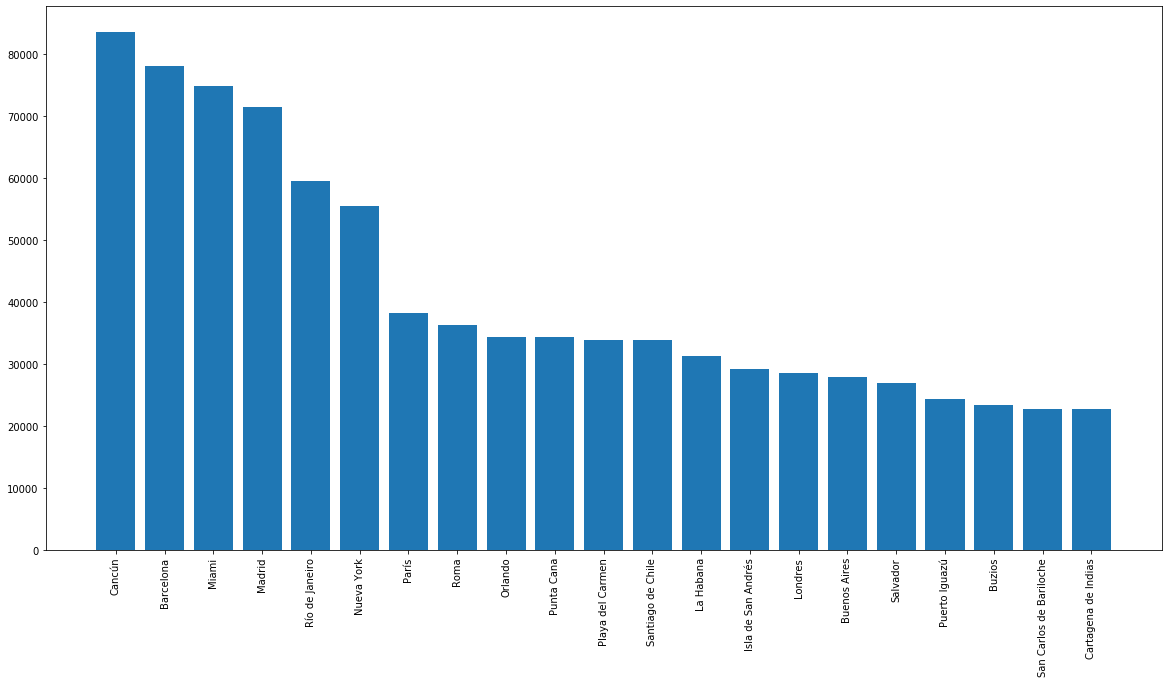

In [6]:
sort_busquedas = busquedas.sort_values(ascending=False)
#plt.plot(sort_busquedas)
#plt.show()

# Me quedo con los destinos de mas de 20000 busquedas
filtered_sort_busquedas = sort_busquedas[sort_busquedas >= 20000]
filtered_sort_busquedas_test = pd.DataFrame()
filtered_sort_busquedas_test['codes'] = filtered_sort_busquedas.index
filtered_sort_busquedas_test['n_search'] = np.array(filtered_sort_busquedas)
nombres = filtered_sort_busquedas_test.merge(catalog, on='codes')

plt.figure(figsize=(20,10)) 
plt.bar(x=nombres['name'], height=nombres['n_search'])
plt.xticks(rotation='vertical')
plt.show()


In [7]:
data_items = sparse_matrix.drop('id', 1)

#------------------------
# ITEM-ITEM CALCULATIONS
#------------------------

# As a first step we normalize the user vectors to unit vectors.

# magnitude = sqrt(x2 + y2 + z2 + ...)
magnitude = np.sqrt(np.square(data_items).sum(axis=1))

# unitvector = (x / magnitude, y / magnitude, z / magnitude, ...)
data_items = data_items.divide(magnitude, axis='index')

def calculate_similarity(data_items):
    """Calculate the column-wise cosine similarity for a sparse
    matrix. Return a new dataframe matrix with similarities.
    """
    data_sparse = sparse.csr_matrix(data_items)
    similarities = cosine_similarity(data_sparse.transpose())
    sim = pd.DataFrame(data=similarities, index= data_items.columns, columns= data_items.columns)
    return sim

# Build the similarity matrix
data_matrix = calculate_similarity(data_items)

print(data_matrix.loc['t_23'].nlargest(11))

t_23     1.000000
t_115    0.195491
t_61     0.139009
t_139    0.115806
t_105    0.092078
t_33     0.087746
t_330    0.084748
t_208    0.080661
t_62     0.073525
t_39     0.063401
t_293    0.062681
Name: t_23, dtype: float64


In [8]:
#------------------------
# USER-ITEM CALCULATIONS
#------------------------

# Construct a new dataframe with the 10 closest neighbours (most similar) for each destination.
data_neighbours = pd.DataFrame(index=data_matrix.columns, columns=range(1,11))
for i in range(0, len(data_matrix.columns)):
    data_neighbours.iloc[i,:10] = data_matrix.iloc[0:,i].sort_values(ascending=False)[:10].index
    

# Get the destinations the user 0 has searched.
known_user_likes = data_items.iloc[0,:]
known_user_likes = known_user_likes[known_user_likes >0].index.values

# Construct the neighbourhood from the most similar items to the
# ones our user has already searched.
most_similar_to_likes = data_neighbours.loc[known_user_likes]
similar_list = most_similar_to_likes.values.tolist()
similar_list = list(set([item for sublist in similar_list for item in sublist]))
neighbourhood = data_matrix[similar_list].loc[similar_list]

# A user vector containing only the neighbourhood items and the known user likes.
user_vector = data_items.iloc[0,:].loc[similar_list]

# Calculate the score.
score = neighbourhood.dot(user_vector).div(neighbourhood.sum(axis=1))

# Drop the known likes.
score = score.drop(known_user_likes)

print(known_user_likes)
print(score.nlargest(20))

['t_23' 't_239' 't_330']
t_67     0.076076
t_125    0.070082
t_115    0.069522
t_51     0.061979
t_320    0.060336
t_61     0.059954
t_312    0.058614
t_71     0.055739
t_39     0.054771
t_20     0.052722
t_333    0.051954
t_79     0.051531
t_260    0.050872
t_139    0.048841
t_350    0.048721
t_241    0.048457
t_179    0.046713
t_137    0.041736
t_258    0.038884
t_33     0.036809
dtype: float64


In [9]:
# Exporto para poder armar API
data_neighbours.to_csv('model/data_neighbours.csv')
data_matrix.to_csv('model/data_matrix.csv')